# Predicting the Price of Used Cars
*On a simple dataset*

In this module, we are going to predict the Price of Used Cars using various features like Present_Price, Selling_Price, Kms_Driven, Fuel_Type, Year etc. The data used in this project was downloaded from Kaggle.

**To be able to predict used cars market value can help both buyers and sellers.**

This will be used in our postbid app to help user decide what price should they put.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

# Loading the raw data

In [2]:
df = pd.read_csv('car_price_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Preprocessing

**Exploring the descriptive statistics of the variables**

In [3]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,271,271.000000,271.000000,271.000000,271.000000,271,271,271,271.000000
unique,89,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,22,NaN,NaN,NaN,NaN,212,189,231,NaN
mean,NaN,2013.538745,4.969004,8.172989,38227.848708,NaN,NaN,NaN,0.047970
std,NaN,2.959819,5.178212,8.852324,40239.186807,NaN,NaN,NaN,0.260884
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,1.175000,1.765000,15100.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,4.000000,6.800000,34000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.250000,9.920000,49780.000000,NaN,NaN,NaN,0.000000


In [4]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,271.000000,271.000000,271.000000,271.000000,271.000000
mean,2013.538745,4.969004,8.172989,38227.848708,0.047970
std,2.959819,5.178212,8.852324,40239.186807,0.260884
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,1.175000,1.765000,15100.000000,0.000000
50%,2014.000000,4.000000,6.800000,34000.000000,0.000000
75%,2016.000000,6.250000,9.920000,49780.000000,0.000000
90%,2017.000000,9.700000,16.090000,69341.000000,0.000000
95%,2017.000000,14.815000,22.990000,81500.000000,0.000000
99%,2017.000000,23.150000,35.960000,158552.800000,1.000000


In [5]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       271 non-null    object 
 1   Year           271 non-null    int64  
 2   Selling_Price  271 non-null    float64
 3   Present_Price  271 non-null    float64
 4   Kms_Driven     271 non-null    int64  
 5   Fuel_Type      271 non-null    object 
 6   Seller_Type    271 non-null    object 
 7   Transmission   271 non-null    object 
 8   Owner          271 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 19.2+ KB


**Check for any missing value in data set and treat it**

In [6]:
# checking missing value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Feature Extraction

In [7]:
# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
df['Car_age'] = 2020-df['Year']

#It's time to drop the Year column after the needed info is derived.
df.drop(labels='Year',axis=1,inplace=True)

In [8]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


# Data exploration

**Data Exploration & Visualization**

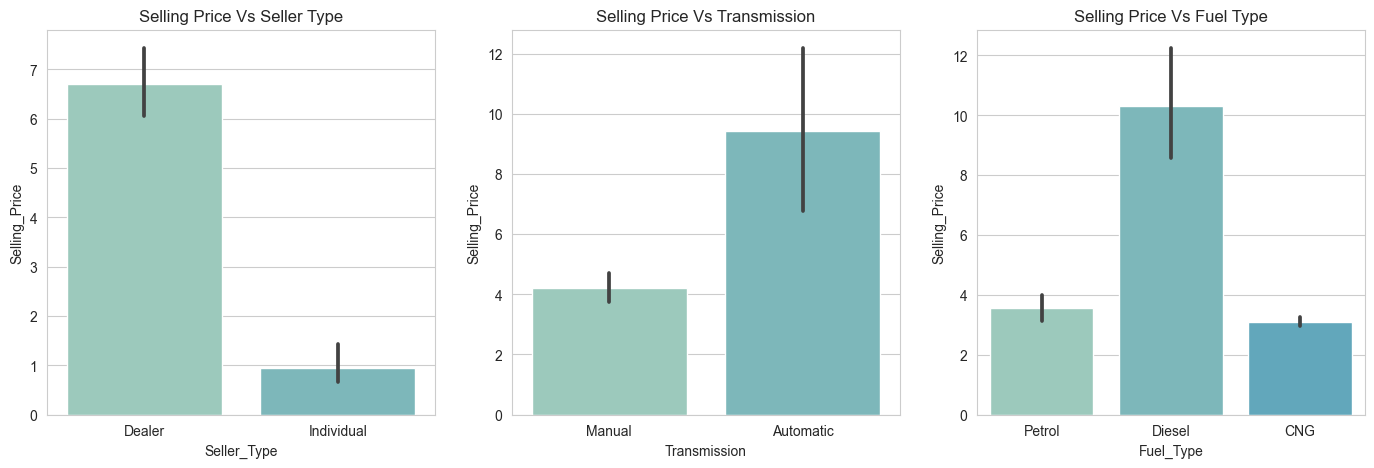

In [9]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x=df['Seller_Type'], y=df['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x=df['Transmission'],y=df['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x=df['Fuel_Type'],y=df['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

* Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals *
* It can be observed that Selling Price would be higher for cars that are Automatic. *
* Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG *

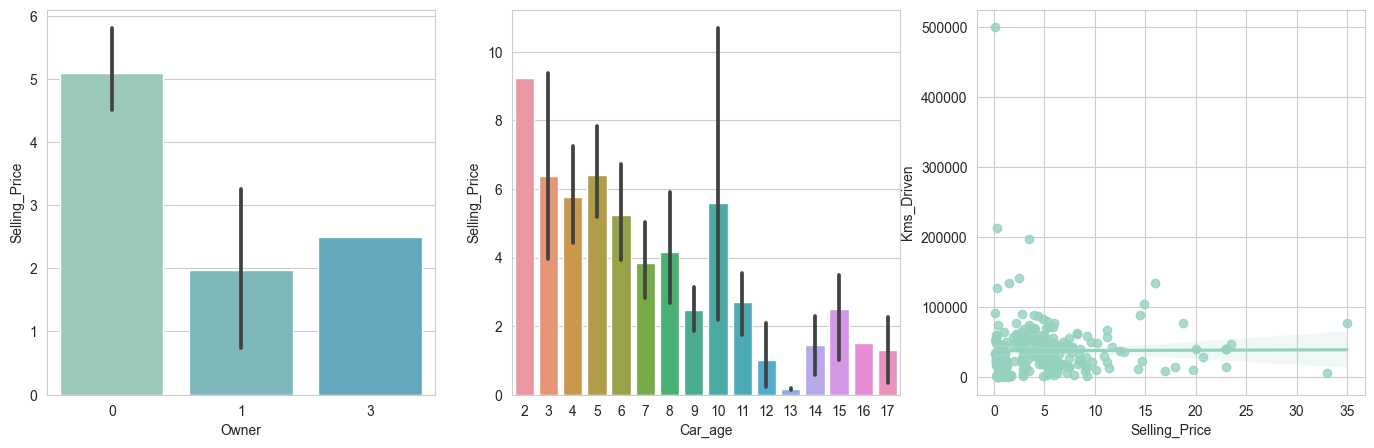

In [10]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x=df['Owner'],y=df['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(x=df['Car_age'],y=df['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(x=df['Selling_Price'],y=df['Kms_Driven'])
plt.show()

* Selling Price is high with less Owners used Cars *
* Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old *
* Lesser the Kms driven higher the Selling Price * 

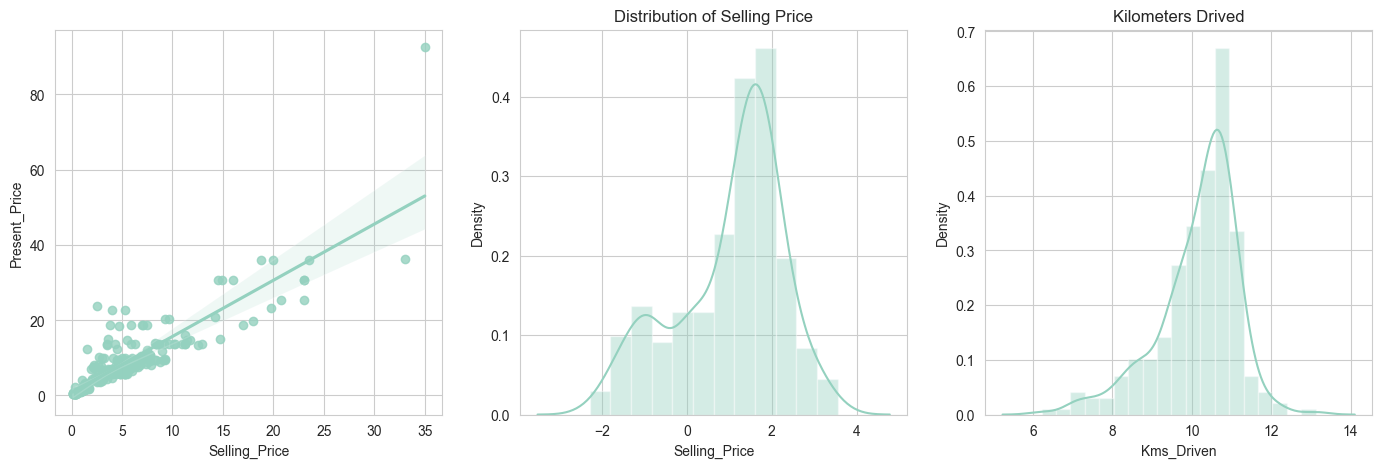

In [11]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(x=df['Selling_Price'],y=df['Present_Price'])

plt.subplot(1,3,2)
sns.distplot(np.log(df['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

* Selling Price tends to increase with increase in the Present Price of cars. *

**Dealing With Categorical Variables**

In [12]:
# Here's our categorical column
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Car_Name'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Honda Activa 4G' 'TVS Sport '
 'Honda Dream Yuga ' 'Bajaj Avenger Street 220' 'TVS Apache RTR 180'
 'Bajaj Pulsar NS 200' 'Bajaj Avenger 220 dtsi' 'Hero Splender iSmart'
 'Activa 3g' 'Hero Passion Pro' 'TVS Apache RTR 160' 'Honda CB Trigger'
 'Yamaha FZ S ' 'Bajaj Pulsar 135 LS' 'Activa 4g' 'Honda CB U

In [13]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels='Car_Name', axis=1)

In [14]:
# Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


# Checking Multicollinearity Using VIF

In [15]:
# Car_age nd fuel_type_petrol feature has high VIF
data_no_multicolinearity = clean_data.drop(['Kms_Driven','Fuel_Type_Petrol'],axis=1)

In [16]:
# cheking again after removing some correlated feature
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# variables = clean_data[['Present_Price','Owner','Car_age','Fuel_Type_Diesel',
#                         'Seller_Type_Individual','Transmission_Manual']]
# vif = pd.DataFrame()
# vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])].astype(float)
# vif["Features"] = variables.columns
# vif

* Now its look good, We have VIF < 5 and hence there is no Multicollinearity occurrence in our model.*

# Feature Selection

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

<Axes: >

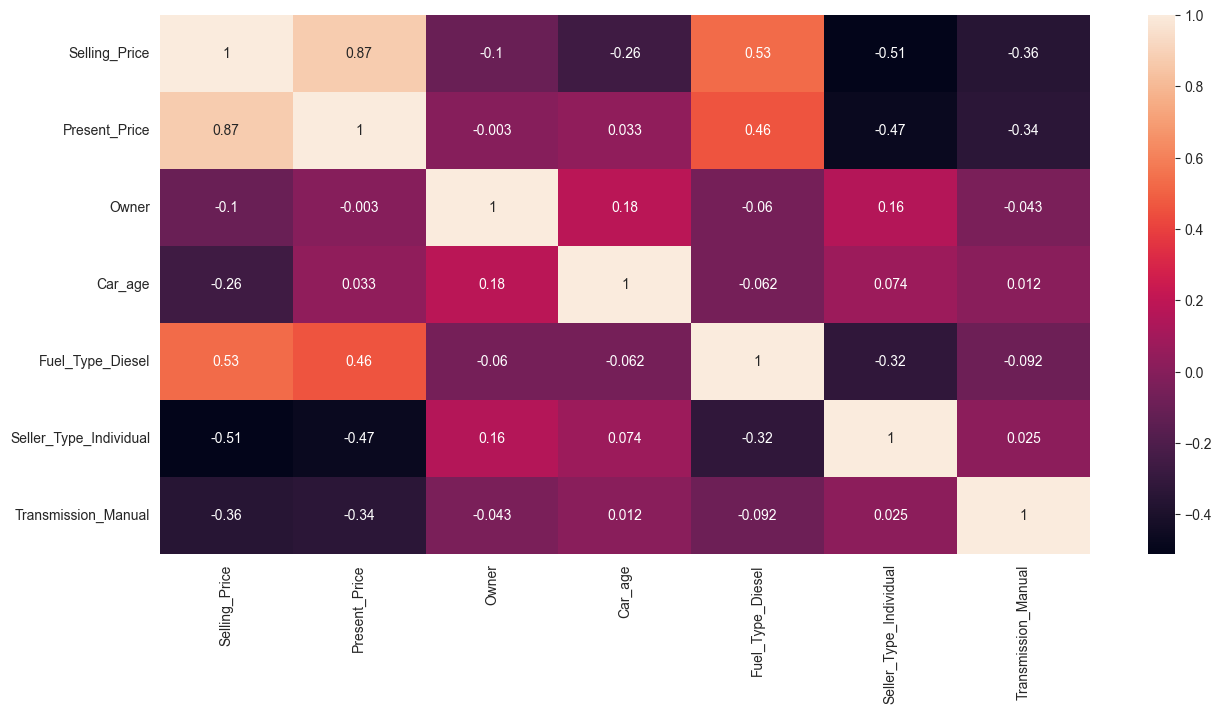

In [17]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

***P-Value*** - P values are one of the best ways to determine if a variable is redundant(usefull or not) but they provide no information. 

If a variable has a p-values >0.05, we can disregard it.

In [18]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.092, 0.   , 0.   , 0.   , 0.   ])

In [19]:
# Creating summary table
model_summry = pd.DataFrame(data=['Present_Price', 'Owner', 'Car_age', 'Fuel_Type_Diesel',
                              'Seller_Type_Individual', 'Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.092
2,Car_age,0.000
3,Fuel_Type_Diesel,0.000
4,Seller_Type_Individual,0.000


 * Dropping the "Owner" feature which has p-value>0.05 resulting in insigificant. It means that Owner variable is not contributing that much in target variable

**Feature Importance**

*Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.*

In [20]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

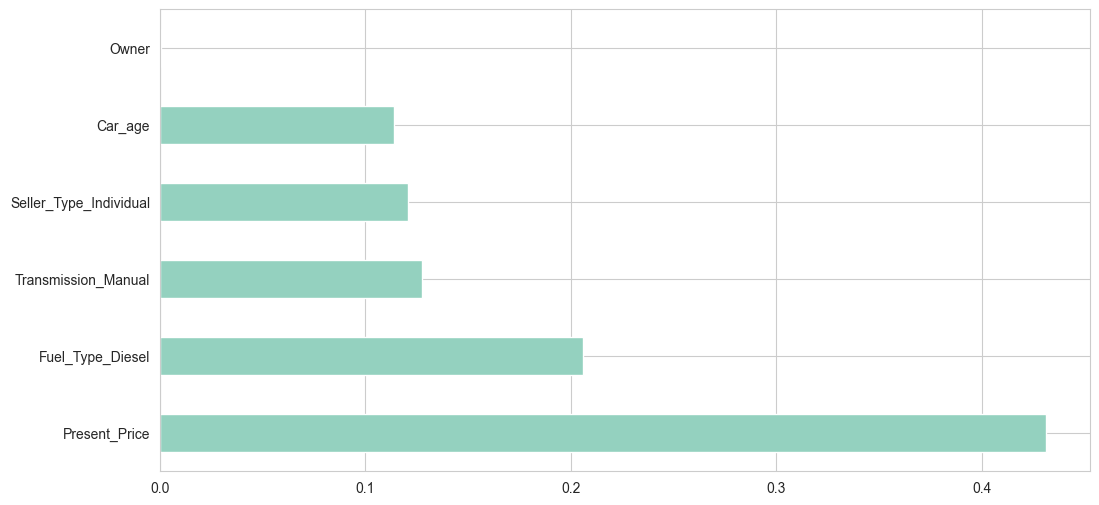

In [21]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [22]:
print(feat_importances.sort_values(ascending=False))

Present_Price             0.431159
Fuel_Type_Diesel          0.205923
Transmission_Manual       0.127769
Seller_Type_Individual    0.120604
Car_age                   0.114048
Owner                     0.000497
dtype: float64


In [23]:
data_no_multicolinearity.columns

Index(['Selling_Price', 'Present_Price', 'Owner', 'Car_age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [24]:
# Selecting useful features.
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Car_age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']]

In [25]:
final_df.head()

,Selling_Price,Present_Price,Car_age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,6,False,False,True
1,4.75,9.54,7,True,False,True
2,7.25,9.85,3,False,False,True
3,2.85,4.15,9,False,False,True
4,4.60,6.87,6,True,False,True


# Model Development

### Declaring dependent and independent variable

In [26]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

### Feature Scaling

In [27]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])

StandardScaler()

In [28]:
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [29]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

### Training and Testing Data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [31]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.7982301817153254


# Random Forest Regressor Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

R_squared : 0.9071621913811033


# GBT Regressor Model

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)

R_squared : 0.9252531023416419


***So as we try diferent Regression Alorithms and found that "Random Forest Regressor Model" is giving better accuracy compare to other.***

# Hyperparameter optimization using RandomizedSearchCV

In [34]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [36]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [38]:
predictions=rf_random.predict(x_test)

In [39]:
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)

R_squared : 0.7780638471109271


# Save the model to reuse it again

In [47]:

# save the model to disk
import pickle
pickle.dump(rf_random, open('rf_model', 'wb'))

'''
# load the model from disk
loaded_model = pickle.load(open('rf_model','rb'))
'''

"\n# load the model from disk\nloaded_model = pickle.load(open('rf_model','rb'))\n"

# Test the model by giving input

In [41]:
def prediction(PresentPrice, CarAge, FuelType,SellerType, Transmissionmanual):
    # feature scaling on present price and car age
    scaled_value = scaler.transform([[float(PresentPrice), int(CarAge)]])
    
    price = scaled_value[0,0]
    age = scaled_value[0,1]
    
    fuel = int(FuelType)
    Seller = int(SellerType)
    trans = int(Transmissionmanual)
    
    return rf_random.predict([[price, age, fuel, Seller, trans]])

In [42]:
prediction(25, 14, 0, 2, 0)

array([7.163456])

In [43]:
prediction(23.73, 14, 0, 1,0)

array([2.8695])

In [46]:
test_data = pd.read_csv('test.csv')
datas = []
for i in range(6):
    data = [test_data['Car_Name'][i],test_data['Year'][i],test_data['Selling_Price'][i],test_data['Present_Price'][i],test_data['Kms_Driven'][i],test_data['Fuel_Type'][i],test_data['Transmission'][i],test_data['Owner'][i],]
    datas += data

for data in datas:
    if data[5] == 'Petrol':
        ft = 0
    elif data[5] == 'Diesel':
        ft = 1

prediction(data[3],2023-data[1],ft)



IndexError: string index out of range

# Conclusions:

* Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
* Car age is effecting negatively as older the car lesser the Selling Price.
* Selling Price of cars with Fuel type Diesel is higher.
* Car of Manual type is of less priced whereas of Automatic type is high.
* Cars sold by Individual tend to get less Selling Price when sold by Dealers.